# 🚀 **Welcome to Notebook 2.1: Diving Deep into Tokenization** 🌊

📚 **Previous Adventure**:  
In our last notebook, we dipped our toes into tokenization with `tiktoken` and built our first dataset. Now, we’re strapping on our scuba gear to **explore the ocean of tokenization** — where every byte, subword, and special character hides secrets!  

## 🧩 **What is Tokenization? Breaking the Code** 🔍  

**Tokenization** is like chopping a 🍎 *sentence* into bite-sized 🍣 *pieces* (tokens!). These tokens can be:  
- **Words** ("hello")  
- **Subwords** ("un+break+able")  
- **Characters** ("h", "e", "l", "l", "o")  
- **Special symbols** ("<|EOS|>")  

**Why does this matter?**  
```python
# Without tokenization, models see this:
"Th!s 1s gibrish_2_LLMs"
# With tokenization:
["Th", "!s", " 1", "s", " gib", "rish", "_2", "_LLMs"]
```

## 🌟 **Why Tokenization Rules NLP** 👑

### 📌 **4 Reasons Tokenization is ESSENTIAL**  
1. **🔢 Text → Numbers**:  
   *"Hello"* → `[15496, 23]` (models speak math, not poetry!)  

2. **🛠️ Vocabulary Control**:  
   Slash 100k+ word chaos into reusable subword Lego bricks 🧱.  

3. **⚡ Turbo Efficiency**:  
   Smaller token sets = Faster training + Smarter models 🚄.  

4. **🎯 Context Mastery**:  
   Tokens preserve meaning like a puzzle — `"bank"` (💰 river) vs. `"bank"` (🏦 financial).  

## 💥 **Tokenization Gone Wrong: A Horror Story** 👻  

**Example: The Math Meltdown**  
```diff
+ GOOD TOKENIZER:
  "2 + 2 = 4" → ["2", "+", "2", "=", "4"] → Model thinks: 4 ✅

- BAD TOKENIZER:
  "2 + 2 = 4" → ["2+", "2=", "4"] → Model outputs: "5" 😱
```

**Why care?**  
A single tokenization error can turn GPT-4 into a 🧟 *math zombie*!  

---

**🔥 Ready to become a Tokenization Titan? Let’s dive in!** 🏊♂️  

```diff
+ PRO TIP: Keep this notebook handy — tokenization skills are the skeleton key to NLP mastery! 🔑
```

In [50]:
# Lets load some data to work with
import os
import urllib.request

if not os.path.exists("the-verdict.txt"):
    url = ("https://raw.githubusercontent.com/rasbt/"
           "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
           "the-verdict.txt")
    file_path = "the-verdict.txt"
    urllib.request.urlretrieve(url, file_path)

In [49]:
with open("the-verdict.txt", "r") as f:
    text = f.read() 

print(f"the length of th text : {len(text)})")
print(f"first 1000 chars:{text[:1000]})")
      

the length of th text : 20479)
first 1000 chars:I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)

"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it's going to send the value of my picture 'way up; but I don't think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing's lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn's "Moon-dancers" to say, with tears in her eyes: "We shall not lo

As we did in the previous notebook we take a look at the all the unique characters

In [3]:
chars  = sorted(list(set(text)))
vocab_size = len(chars)
print(f"Number of unique characters: {vocab_size}")
print(chars)    
for i, char in enumerate(chars):
    print(f"{i} -> {char}")
    

Number of unique characters: 62
['\n', ' ', '!', '"', "'", '(', ')', ',', '-', '.', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
0 -> 

1 ->  
2 -> !
3 -> "
4 -> '
5 -> (
6 -> )
7 -> ,
8 -> -
9 -> .
10 -> :
11 -> ;
12 -> ?
13 -> A
14 -> B
15 -> C
16 -> D
17 -> E
18 -> F
19 -> G
20 -> H
21 -> I
22 -> J
23 -> L
24 -> M
25 -> N
26 -> O
27 -> P
28 -> R
29 -> S
30 -> T
31 -> U
32 -> V
33 -> W
34 -> Y
35 -> _
36 -> a
37 -> b
38 -> c
39 -> d
40 -> e
41 -> f
42 -> g
43 -> h
44 -> i
45 -> j
46 -> k
47 -> l
48 -> m
49 -> n
50 -> o
51 -> p
52 -> q
53 -> r
54 -> s
55 -> t
56 -> u
57 -> v
58 -> w
59 -> x
60 -> y
61 -> z


A very vasic tokenizer is built with a simple mapping between the char and thier int as you see below

In [4]:
char_to_int = {ch:i for i,ch in enumerate(chars)}
int_to_char = {i:ch for i,ch in enumerate(chars)}

encode = lambda s:[char_to_int[c] for c in s]
decode = lambda x:"".join([int_to_char[i] for i in x])


print(f"Encoded: {encode('hello')}")
print(f"Decoded: {decode(encode('hello'))}")


Encoded: [43, 40, 47, 47, 50]
Decoded: hello


We create an **embedding lookup table** where each token (represented by an integer index) maps to a dense vector of size `embedding_dim`. 

For example:
- Token `0` → Vector of shape `(10,)`
- Token `1` → Vector of shape `(10,)`
- ...
- Token `vocab_size-1` → Vector of shape `(10,)`

The `nn.Embedding` layer acts like a dictionary:  
`Input: token index (int)` → `Output: corresponding vector (torch.Tensor)`

In [51]:
import torch
import torch.nn as nn

vocab_size = 1000  # Define vocabulary size
embedding_dim = 10

# Create embedding table
embedding_table = nn.Embedding(vocab_size, embedding_dim)

# Shape: (num_embeddings, embedding_dim)
print(embedding_table.weight.shape)  # Output: torch.Size([1000, 10])

torch.Size([1000, 10])


Lets visulize this for better understanding 

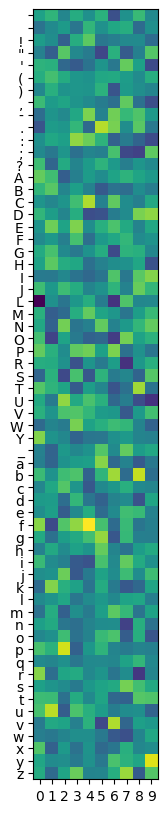

In [52]:
# lets visualize the embedding table
import matplotlib.pyplot as plt
import numpy as np

def plot_embedding_table(embedding_table, int_to_char):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(embedding_table.weight.detach().numpy(), cmap='viridis')
    ax.set_yticks(list(int_to_char.keys()))
    ax.set_yticklabels(list(int_to_char.values()))
    ax.set_xticks(list(range(embedding_table.weight.shape[1])))
    ax.set_xticklabels(list(range(embedding_table.weight.shape[1])))
    plt.show()

plot_embedding_table(embesdding_table, int_to_char)

### **UTF-8 & Text Encoding Fundamentals** 🔤

**What is UTF-8?**  
UTF-8 (Unicode Transformation Format - 8-bit) is the dominant character encoding standard that:
- Represents **every Unicode character** (supports 1.1M+ symbols)
- Uses **1-4 bytes per character** (dynamic width)
- Backward-compatible with ASCII (first 128 characters match)

**Why UTF-8 for Tokenization?**  
Modern tokenizers use UTF-8 encoding to:
1. Handle **multi-language text** seamlessly
2. Process **special characters** (emojis, symbols, etc.)
3. Create consistent byte-level representations before tokenization


This byte representation becomes the foundation for tokenization algorithms like BPE (Byte-Pair Encoding) used in modern LLMs.

In [20]:
# lets use sample text with an emoji
sampel_text = "Hi world 🌍, how are you? 😊"

# using encoding UTF-8
encoded_text = sampel_text.encode("utf-8")
print(f"Encoded text raw: {encoded_text}")
print(f"Encoded text: {list(encoded_text)}")


Encoded text raw: b'Hi world \xf0\x9f\x8c\x8d, how are you? \xf0\x9f\x98\x8a'
Encoded text: [72, 105, 32, 119, 111, 114, 108, 100, 32, 240, 159, 140, 141, 44, 32, 104, 111, 119, 32, 97, 114, 101, 32, 121, 111, 117, 63, 32, 240, 159, 152, 138]


Here's why UTF-8 is preferred over UTF-16/32 for text processing and tokenization in modern NLP:

---

### **1. Space Efficiency** 💾
| Encoding | ASCII (1 byte) | Common Latin (2 bytes) | Emojis/Special (4 bytes) |
|----------|----------------|------------------------|--------------------------|
| UTF-8    | 1 byte         | 2 bytes                | 4 bytes                  |
| UTF-16   | 2 bytes        | 2 bytes                | 4 bytes                  |
| UTF-32   | 4 bytes        | 4 bytes                | 4 bytes                  |

**Example with your text**:
```python
text = "Hi world 🌍, how are you? 😊"

# Byte counts:
UTF-8  → 25 bytes  
UTF-16 → 46 bytes  (+84% larger)
UTF-32 → 92 bytes  (+268% larger)
```

---

### **2. Compatibility & Adoption** 🌐
- **UTF-8**:
  - Backward compatible with ASCII
  - Used by 98% of web pages ([W3Techs](https://w3techs.com/technologies/overview/character_encoding))
  - Default encoding in Python/Linux/Modern APIs

- **UTF-16/32**:
  - Requires byte-order mark (BOM) for endianness
  - Mainly used in legacy systems (Windows APIs, Java)

---

### **3. Tokenization Advantages** 🔠
Modern tokenizers (BERT, GPT, etc.) use **byte-level operations**:
```python
# UTF-8 allows cleaner byte-to-token mapping
text = "🌍"
utf8_bytes = [240, 159, 140, 141]  # Clear 4-byte emoji
utf16_bytes = [255, 254, 61, 216, 13, 220]  # BOM + surrogate pairs
```

**Why this matters**:
- BPE (Byte-Pair Encoding) works directly with UTF-8 bytes
- Fixed 4-byte UTF-32 wastes space for common characters
- UTF-16's surrogate pairs complicate token merging

---

### **4. Real-World Impact** 🚀
| Scenario               | UTF-8 Advantage                                |
|------------------------|-----------------------------------------------|
| Model Training          | Smaller datasets → Faster training            |
| API Payloads            | Reduced bandwidth usage                       |
| Multilingual Support    | Efficient mixing of Latin/Non-Latin scripts   |
| Emoji Handling          | Consistent 4-byte representation              |

---

### **When to Use UTF-16/32?**
- **UTF-16**: Memory-constrained Asian language apps (fixed 2 bytes per common Hanzi)
- **UTF-32**: Rare text processing requiring O(1) character indexing

For 99% of NLP use cases, **UTF-8 is the optimal choice** for balancing efficiency, compatibility, and modern tokenization needs.

In [21]:
# why no using UTF-16 or UTF-32
encoded_text = sampel_text.encode("utf-16")
print(f"Encoded text in raw bytes: {list(encoded_text)}")

encoded_text = sampel_text.encode("utf-32")
print(f"Encoded text in raw bytes: {list(encoded_text)}")


Encoded text in raw bytes: [255, 254, 72, 0, 105, 0, 32, 0, 119, 0, 111, 0, 114, 0, 108, 0, 100, 0, 32, 0, 60, 216, 13, 223, 44, 0, 32, 0, 104, 0, 111, 0, 119, 0, 32, 0, 97, 0, 114, 0, 101, 0, 32, 0, 121, 0, 111, 0, 117, 0, 63, 0, 32, 0, 61, 216, 10, 222]
Encoded text in raw bytes: [255, 254, 0, 0, 72, 0, 0, 0, 105, 0, 0, 0, 32, 0, 0, 0, 119, 0, 0, 0, 111, 0, 0, 0, 114, 0, 0, 0, 108, 0, 0, 0, 100, 0, 0, 0, 32, 0, 0, 0, 13, 243, 1, 0, 44, 0, 0, 0, 32, 0, 0, 0, 104, 0, 0, 0, 111, 0, 0, 0, 119, 0, 0, 0, 32, 0, 0, 0, 97, 0, 0, 0, 114, 0, 0, 0, 101, 0, 0, 0, 32, 0, 0, 0, 121, 0, 0, 0, 111, 0, 0, 0, 117, 0, 0, 0, 63, 0, 0, 0, 32, 0, 0, 0, 10, 246, 1, 0]


In [9]:
longer_text =  """
Hello, world! 🌎 I hope you're all doing fantastic today. 🌟 Life is full of surprises, and every day is a new opportunity to grow, learn, and smile. 😊  
Take a deep breath, step outside, and enjoy the little things 🌸—like the sound of birds chirping 🐦, the warmth of the sun ☀️, or even a good cup of coffee ☕.  

Remember, challenges are just opportunities in disguise. 💪 So keep pushing forward, believe in yourself, and never stop dreaming. 🌈  
Oh, and don’t forget to share kindness and spread positivity wherever you go. ❤️  
Have an amazing day ahead! 🚀
"""
# using encoding UTF-8 to get the raw bytes stream
tokens = longer_text.encode("utf-8")
tokens=list(map(int , tokens))
print("_________________________")
print(longer_text)
print("length of the text: ", len(longer_text))
print("_________________________")
print("Encoded text: ", tokens)
print("length of the encoded text: ", len(tokens))


_________________________

Hello, world! 🌎 I hope you're all doing fantastic today. 🌟 Life is full of surprises, and every day is a new opportunity to grow, learn, and smile. 😊  
Take a deep breath, step outside, and enjoy the little things 🌸—like the sound of birds chirping 🐦, the warmth of the sun ☀️, or even a good cup of coffee ☕.  

Remember, challenges are just opportunities in disguise. 💪 So keep pushing forward, believe in yourself, and never stop dreaming. 🌈  
Oh, and don’t forget to share kindness and spread positivity wherever you go. ❤️  
Have an amazing day ahead! 🚀

length of the text:  560
_________________________
Encoded text:  [10, 72, 101, 108, 108, 111, 44, 32, 119, 111, 114, 108, 100, 33, 32, 240, 159, 140, 142, 32, 73, 32, 104, 111, 112, 101, 32, 121, 111, 117, 39, 114, 101, 32, 97, 108, 108, 32, 100, 111, 105, 110, 103, 32, 102, 97, 110, 116, 97, 115, 116, 105, 99, 32, 116, 111, 100, 97, 121, 46, 32, 240, 159, 140, 159, 32, 76, 105, 102, 101, 32, 105, 115, 32, 10

# Byte-Pair Encoding (BPE) Explained Concisely 🧩

## **What is BPE?**  
A *subword tokenization* algorithm that merges frequent character pairs to create reusable units, balancing word-level meaning and character-level flexibility.

## **How BPE Works** (Visual Walkthrough)

### **1. Training Corpus**  
`["low", "lower", "newest", "newer"]`

### **2. Step-by-Step Process**  
**Initial Split** → Characters:  
`l o w | l o w e r | n e w e s t | n e w e r`

**Merge Most Frequent Pairs**:  
1️⃣ `l` + `o` → **`lo`** (2x)  
   → `lo w | lo w e r | n e w e s t | n e w e r`  
2️⃣ `lo` + `w` → **`low`** (2x)  
   → `low | low e r | n e w e s t | n e w e r`  
3️⃣ `e` + `r` → **`er`** (2x)  
   → `low | lower | n e w e s t | newer`

### **3. Final Tokens**  
`["low", "er", "n", "e", "w", "es", "t"]`

Here's a **concise technical blueprint** for building a BPE tokenizer:

---

### **1. Core Components**  
1. **Frequency Analyzer**  
   - *Goal*: Identify most common adjacent token pairs in a corpus  
   - *Method*: Sliding window scan + hashmap counting  
   - *Key*: Optimized for large datasets (stream processing)  

2. **Pair Merger**  
   - *Goal*: Replace frequent pairs with new unified tokens  
   - *Method*: Iterative replacement + vocabulary expansion  
   - *Key*: Preserve merge order for consistent encoding  

3. **Encoder**  
   - *Pipeline*: Text → UTF-8 bytes → apply merges → token IDs  
   - *Optimization*: O(1) pair lookups via precomputed merge rules  

4. **Decoder**  
   - *Pipeline*: Token IDs → byte sequences → UTF-8 text  
   - *Edge Handling*: Graceful unknown token fallback  

5. **Tokenizer Class**  
   - *State*: `merges`, `vocab`, `next_id`  
   - *Methods*: `train()`, `encode()`, `decode()`  


In [ ]:
def most_common_pairs(ids):
    """Counts consecutive ID pairs in a token sequence.
    
    Args:
        ids: List of token IDs representing encoded text
        
    Returns:
        Dictionary with (id1, id2) pairs as keys and counts as values
    """
    counts = {}
    # Iterate through consecutive pairs using zip:
    # zip(ids, ids[1:]) creates pairs like (ids[0], ids[1]), (ids[1], ids[2]), etc.
    for pair in zip(ids, ids[1:]):
        # Get current count or default to 0, then increment
        counts[pair] = counts.get(pair, 0) + 1
    return counts

# Example usage with token IDs (pretend these are byte values)
tokens = [1, 2, 2, 3, 2, 2, 3]  # Sample token sequence
counts = most_common_pairs(tokens)

print(f"Number of unique pairs: {len(counts)}")
# Output: Number of unique pairs: 3

# Sort pairs by frequency descending using:
# - Generator expression to iterate through dict items
# - sorted() with reverse=True for descending order
sorted_counts = sorted(((k,v) for k,v in counts.items()), key=lambda x: -x[1])
print(sorted_counts)
# Output: [((2, 2), 2), ((2, 3), 2), ((1, 2), 1), ((3, 2), 1)]

Number of unique pairs: 1381
[((240, 159), 16), ((239, 189), 6), ((239, 188), 1), ((237, 149), 1), ((226, 151), 7), ((226, 128), 254), ((225, 187), 5), ((225, 186), 1), ((225, 185), 2), ((225, 184), 5), ((225, 134), 1), ((225, 133), 1), ((225, 132), 1), ((224, 164), 4), ((215, 170), 6), ((215, 169), 4), ((215, 167), 2), ((215, 162), 2), ((215, 160), 2), ((215, 156), 4), ((215, 155), 2), ((215, 153), 10), ((215, 152), 2), ((215, 150), 4), ((215, 149), 2), ((215, 148), 4), ((215, 147), 4), ((215, 145), 2), ((215, 144), 2), ((215, 129), 2), ((214, 188), 3), ((214, 185), 1), ((214, 184), 1), ((214, 183), 3), ((214, 182), 3), ((214, 181), 2), ((214, 180), 5), ((214, 176), 2), ((210, 137), 3), ((206, 184), 1), ((205, 162), 3), ((205, 161), 3), ((205, 160), 3), ((205, 159), 3), ((205, 158), 3), ((205, 157), 6), ((205, 156), 7), ((205, 154), 5), ((205, 153), 18), ((205, 152), 5), ((205, 150), 14), ((205, 149), 10), ((205, 148), 11), ((205, 147), 11), ((205, 143), 1), ((205, 142), 8), ((205, 14

We can see what pair with the most appreance

In [11]:
top_pair = max(counts, key=counts.get)
top_pair

(101, 32)

The second step is to implemet a funtion that merge the pair we selected in the previuos function

In [12]:
def merge(ids, pair, idx):
    """
    Replaces all occurrences of a specified pair in a token sequence with a new index.
    
    Args:
        ids (list): List of token IDs to process
        pair (tuple): Pair of consecutive token IDs to replace (left, right)
        idx (int): New token ID to substitute for the pair
    
    Returns:
        list: New list of token IDs with replacements applied
    """
    new_ids = []  # Initialize list to store merged tokens
    i = 0  # Index pointer for original ids list
    
    # Iterate through the token sequence
    while i < len(ids):
        # Check if we can look ahead and find the target pair
        if i < len(ids) - 1 and (ids[i], ids[i+1]) == pair:
            # Replace pair with new index
            new_ids.append(idx)
            # Skip over the second element of the pair
            i += 2
        else:
            # Keep original token if no pair found
            new_ids.append(ids[i])
            i += 1
            
    return new_ids

# Example usage
ids = [1, 2, 3, 4, 2, 3, 5]  # Original token sequence
pair = (2, 3)  # Pair to find and replace
idx = 9  # Replacement token ID

result = merge(ids, pair, idx)
print(f"Original: {ids}")
print(f"After merging {pair} → {idx}: {result}")

[1, 9, 4, 9, 5]


In [13]:
tokens2 = merge(tokens, top_pair, 256)
print("length of the new tokens: ", len(tokens2))
print("length of the original tokens: ", len(tokens))

length of the new tokens:  583
length of the original tokens:  598


Lets try woking with larger text corpus

In [14]:
encoded_text2 = text.encode("utf-8")
full_tokens = list(map(int, encoded_text2))


In [15]:
# making the training text longer to have more representative token statistics
# text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = """A Programmer’s Introduction to Unicode March 3, 2017 · Coding · 22 Comments  Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺\u200c🇳\u200c🇮\u200c🇨\u200c🇴\u200c🇩\u200c🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.  A few months ago, I got interested in Unicode and decided to spend some time learning more about it in detail. In this article, I’ll give an introduction to it from a programmer’s point of view.  I’m going to focus on the character set and what’s involved in working with strings and files of Unicode text. However, in this article I’m not going to talk about fonts, text layout/shaping/rendering, or localization in detail—those are separate issues, beyond my scope (and knowledge) here.  Diversity and Inherent Complexity The Unicode Codespace Codespace Allocation Scripts Usage Frequency Encodings UTF-8 UTF-16 Combining Marks Canonical Equivalence Normalization Forms Grapheme Clusters And More… Diversity and Inherent Complexity As soon as you start to study Unicode, it becomes clear that it represents a large jump in complexity over character sets like ASCII that you may be more familiar with. It’s not just that Unicode contains a much larger number of characters, although that’s part of it. Unicode also has a great deal of internal structure, features, and special cases, making it much more than what one might expect a mere “character set” to be. We’ll see some of that later in this article.  When confronting all this complexity, especially as an engineer, it’s hard not to find oneself asking, “Why do we need all this? Is this really necessary? Couldn’t it be simplified?”  However, Unicode aims to faithfully represent the entire world’s writing systems. The Unicode Consortium’s stated goal is “enabling people around the world to use computers in any language”. And as you might imagine, the diversity of written languages is immense! To date, Unicode supports 135 different scripts, covering some 1100 languages, and there’s still a long tail of over 100 unsupported scripts, both modern and historical, which people are still working to add.  Given this enormous diversity, it’s inevitable that representing it is a complicated project. Unicode embraces that diversity, and accepts the complexity inherent in its mission to include all human writing systems. It doesn’t make a lot of trade-offs in the name of simplification, and it makes exceptions to its own rules where necessary to further its mission.  Moreover, Unicode is committed not just to supporting texts in any single language, but also to letting multiple languages coexist within one text—which introduces even more complexity.  Most programming languages have libraries available to handle the gory low-level details of text manipulation, but as a programmer, you’ll still need to know about certain Unicode features in order to know when and how to apply them. It may take some time to wrap your head around it all, but don’t be discouraged—think about the billions of people for whom your software will be more accessible through supporting text in their language. Embrace the complexity!  The Unicode Codespace Let’s start with some general orientation. The basic elements of Unicode—its “characters”, although that term isn’t quite right—are called code points. Code points are identified by number, customarily written in hexadecimal with the prefix “U+”, such as U+0041 “A” latin capital letter a or U+03B8 “θ” greek small letter theta. Each code point also has a short name, and quite a few other properties, specified in the Unicode Character Database.  The set of all possible code points is called the codespace. The Unicode codespace consists of 1,114,112 code points. However, only 128,237 of them—about 12% of the codespace—are actually assigned, to date. There’s plenty of room for growth! Unicode also reserves an additional 137,468 code points as “private use” areas, which have no standardized meaning and are available for individual applications to define for their own purposes.  Codespace Allocation To get a feel for how the codespace is laid out, it’s helpful to visualize it. Below is a map of the entire codespace, with one pixel per code point. It’s arranged in tiles for visual coherence; each small square is 16×16 = 256 code points, and each large square is a “plane” of 65,536 code points. There are 17 planes altogether.  Map of the Unicode codespace (click to zoom)  White represents unassigned space. Blue is assigned code points, green is private-use areas, and the small red area is surrogates (more about those later). As you can see, the assigned code points are distributed somewhat sparsely, but concentrated in the first three planes.  Plane 0 is also known as the “Basic Multilingual Plane”, or BMP. The BMP contains essentially all the characters needed for modern text in any script, including Latin, Cyrillic, Greek, Han (Chinese), Japanese, Korean, Arabic, Hebrew, Devanagari (Indian), and many more.  (In the past, the codespace was just the BMP and no more—Unicode was originally conceived as a straightforward 16-bit encoding, with only 65,536 code points. It was expanded to its current size in 1996. However, the vast majority of code points in modern text belong to the BMP.)  Plane 1 contains historical scripts, such as Sumerian cuneiform and Egyptian hieroglyphs, as well as emoji and various other symbols. Plane 2 contains a large block of less-common and historical Han characters. The remaining planes are empty, except for a small number of rarely-used formatting characters in Plane 14; planes 15–16 are reserved entirely for private use.  Scripts Let’s zoom in on the first three planes, since that’s where the action is:  Map of scripts in Unicode planes 0–2 (click to zoom)  This map color-codes the 135 different scripts in Unicode. You can see how Han () and Korean () take up most of the range of the BMP (the left large square). By contrast, all of the European, Middle Eastern, and South Asian scripts fit into the first row of the BMP in this diagram.  Many areas of the codespace are adapted or copied from earlier encodings. For example, the first 128 code points of Unicode are just a copy of ASCII. This has clear benefits for compatibility—it’s easy to losslessly convert texts from smaller encodings into Unicode (and the other direction too, as long as no characters outside the smaller encoding are used).  Usage Frequency One more interesting way to visualize the codespace is to look at the distribution of usage—in other words, how often each code point is actually used in real-world texts. Below is a heat map of planes 0–2 based on a large sample of text from Wikipedia and Twitter (all languages). Frequency increases from black (never seen) through red and yellow to white.  Heat map of code point usage frequency in Unicode planes 0–2 (click to zoom)  You can see that the vast majority of this text sample lies in the BMP, with only scattered usage of code points from planes 1–2. The biggest exception is emoji, which show up here as the several bright squares in the bottom row of plane 1.  Encodings We’ve seen that Unicode code points are abstractly identified by their index in the codespace, ranging from U+0000 to U+10FFFF. But how do code points get represented as bytes, in memory or in a file?  The most convenient, computer-friendliest (and programmer-friendliest) thing to do would be to just store the code point index as a 32-bit integer. This works, but it consumes 4 bytes per code point, which is sort of a lot. Using 32-bit ints for Unicode will cost you a bunch of extra storage, memory, and performance in bandwidth-bound scenarios, if you work with a lot of text.  Consequently, there are several more-compact encodings for Unicode. The 32-bit integer encoding is officially called UTF-32 (UTF = “Unicode Transformation Format”), but it’s rarely used for storage. At most, it comes up sometimes as a temporary internal representation, for examining or operating on the code points in a string.  Much more commonly, you’ll see Unicode text encoded as either UTF-8 or UTF-16. These are both variable-length encodings, made up of 8-bit or 16-bit units, respectively. In these schemes, code points with smaller index values take up fewer bytes, which saves a lot of memory for typical texts. The trade-off is that processing UTF-8/16 texts is more programmatically involved, and likely slower.  UTF-8 In UTF-8, each code point is stored using 1 to 4 bytes, based on its index value.  UTF-8 uses a system of binary prefixes, in which the high bits of each byte mark whether it’s a single byte, the beginning of a multi-byte sequence, or a continuation byte; the remaining bits, concatenated, give the code point index. This table shows how it works:  UTF-8 (binary)\tCode point (binary)\tRange 0xxxxxxx\txxxxxxx\tU+0000–U+007F 110xxxxx 10yyyyyy\txxxxxyyyyyy\tU+0080–U+07FF 1110xxxx 10yyyyyy 10zzzzzz\txxxxyyyyyyzzzzzz\tU+0800–U+FFFF 11110xxx 10yyyyyy 10zzzzzz 10wwwwww\txxxyyyyyyzzzzzzwwwwww\tU+10000–U+10FFFF A handy property of UTF-8 is that code points below 128 (ASCII characters) are encoded as single bytes, and all non-ASCII code points are encoded using sequences of bytes 128–255. This has a couple of nice consequences. First, any strings or files out there that are already in ASCII can also be interpreted as UTF-8 without any conversion. Second, lots of widely-used string programming idioms—such as null termination, or delimiters (newlines, tabs, commas, slashes, etc.)—will just work on UTF-8 strings. ASCII bytes never occur inside the encoding of non-ASCII code points, so searching byte-wise for a null terminator or a delimiter will do the right thing.  Thanks to this convenience, it’s relatively simple to extend legacy ASCII programs and APIs to handle UTF-8 strings. UTF-8 is very widely used in the Unix/Linux and Web worlds, and many programmers argue UTF-8 should be the default encoding everywhere.  However, UTF-8 isn’t a drop-in replacement for ASCII strings in all respects. For instance, code that iterates over the “characters” in a string will need to decode UTF-8 and iterate over code points (or maybe grapheme clusters—more about those later), not bytes. When you measure the “length” of a string, you’ll need to think about whether you want the length in bytes, the length in code points, the width of the text when rendered, or something else.  UTF-16 The other encoding that you’re likely to encounter is UTF-16. It uses 16-bit words, with each code point stored as either 1 or 2 words.  Like UTF-8, we can express the UTF-16 encoding rules in the form of binary prefixes:  UTF-16 (binary)\tCode point (binary)\tRange xxxxxxxxxxxxxxxx\txxxxxxxxxxxxxxxx\tU+0000–U+FFFF 110110xxxxxxxxxx 110111yyyyyyyyyy\txxxxxxxxxxyyyyyyyyyy + 0x10000\tU+10000–U+10FFFF A more common way that people talk about UTF-16 encoding, though, is in terms of code points called “surrogates”. All the code points in the range U+D800–U+DFFF—or in other words, the code points that match the binary prefixes 110110 and 110111 in the table above—are reserved specifically for UTF-16 encoding, and don’t represent any valid characters on their own. They’re only meant to occur in the 2-word encoding pattern above, which is called a “surrogate pair”. Surrogate code points are illegal in any other context! They’re not allowed in UTF-8 or UTF-32 at all.  Historically, UTF-16 is a descendant of the original, pre-1996 versions of Unicode, in which there were only 65,536 code points. The original intention was that there would be no different “encodings”; Unicode was supposed to be a straightforward 16-bit character set. Later, the codespace was expanded to make room for a long tail of less-common (but still important) Han characters, which the Unicode designers didn’t originally plan for. Surrogates were then introduced, as—to put it bluntly—a kludge, allowing 16-bit encodings to access the new code points.  Today, Javascript uses UTF-16 as its standard string representation: if you ask for the length of a string, or iterate over it, etc., the result will be in UTF-16 words, with any code points outside the BMP expressed as surrogate pairs. UTF-16 is also used by the Microsoft Win32 APIs; though Win32 supports either 8-bit or 16-bit strings, the 8-bit version unaccountably still doesn’t support UTF-8—only legacy code-page encodings, like ANSI. This leaves UTF-16 as the only way to get proper Unicode support in Windows. (Update: in Win10 version 1903, they finally added UTF-8 support to the 8-bit APIs! 😊)  By the way, UTF-16’s words can be stored either little-endian or big-endian. Unicode has no opinion on that issue, though it does encourage the convention of putting U+FEFF zero width no-break space at the top of a UTF-16 file as a byte-order mark, to disambiguate the endianness. (If the file doesn’t match the system’s endianness, the BOM will be decoded as U+FFFE, which isn’t a valid code point.)  Combining Marks In the story so far, we’ve been focusing on code points. But in Unicode, a “character” can be more complicated than just an individual code point!  Unicode includes a system for dynamically composing characters, by combining multiple code points together. This is used in various ways to gain flexibility without causing a huge combinatorial explosion in the number of code points.  In European languages, for example, this shows up in the application of diacritics to letters. Unicode supports a wide range of diacritics, including acute and grave accents, umlauts, cedillas, and many more. All these diacritics can be applied to any letter of any alphabet—and in fact, multiple diacritics can be used on a single letter.  If Unicode tried to assign a distinct code point to every possible combination of letter and diacritics, things would rapidly get out of hand. Instead, the dynamic composition system enables you to construct the character you want, by starting with a base code point (the letter) and appending additional code points, called “combining marks”, to specify the diacritics. When a text renderer sees a sequence like this in a string, it automatically stacks the diacritics over or under the base letter to create a composed character.  For example, the accented character “Á” can be expressed as a string of two code points: U+0041 “A” latin capital letter a plus U+0301 “◌́” combining acute accent. This string automatically gets rendered as a single character: “Á”.  Now, Unicode does also include many “precomposed” code points, each representing a letter with some combination of diacritics already applied, such as U+00C1 “Á” latin capital letter a with acute or U+1EC7 “ệ” latin small letter e with circumflex and dot below. I suspect these are mostly inherited from older encodings that were assimilated into Unicode, and kept around for compatibility. In practice, there are precomposed code points for most of the common letter-with-diacritic combinations in European-script languages, so they don’t use dynamic composition that much in typical text.  Still, the system of combining marks does allow for an arbitrary number of diacritics to be stacked on any base character. The reductio-ad-absurdum of this is Zalgo text, which works by ͖͟ͅr͞aṋ̫̠̖͈̗d͖̻̹óm̪͙͕̗̝ļ͇̰͓̳̫ý͓̥̟͍ ̕s̫t̫̱͕̗̰̼̘͜a̼̩͖͇̠͈̣͝c̙͍k̖̱̹͍͘i̢n̨̺̝͇͇̟͙ģ̫̮͎̻̟ͅ ̕n̼̺͈͞u̮͙m̺̭̟̗͞e̞͓̰̤͓̫r̵o̖ṷs҉̪͍̭̬̝̤ ̮͉̝̞̗̟͠d̴̟̜̱͕͚i͇̫̼̯̭̜͡ḁ͙̻̼c̲̲̹r̨̠̹̣̰̦i̱t̤̻̤͍͙̘̕i̵̜̭̤̱͎c̵s ͘o̱̲͈̙͖͇̲͢n͘ ̜͈e̬̲̠̩ac͕̺̠͉h̷̪ ̺̣͖̱ḻ̫̬̝̹ḙ̙̺͙̭͓̲t̞̞͇̲͉͍t̷͔̪͉̲̻̠͙e̦̻͈͉͇r͇̭̭̬͖,̖́ ̜͙͓̣̭s̘̘͈o̱̰̤̲ͅ ̛̬̜̙t̼̦͕̱̹͕̥h̳̲͈͝ͅa̦t̻̲ ̻̟̭̦̖t̛̰̩h̠͕̳̝̫͕e͈̤̘͖̞͘y҉̝͙ ̷͉͔̰̠o̞̰v͈͈̳̘͜er̶f̰͈͔ḻ͕̘̫̺̲o̲̭͙͠ͅw̱̳̺ ͜t̸h͇̭͕̳͍e̖̯̟̠ ͍̞̜͔̩̪͜ļ͎̪̲͚i̝̲̹̙̩̹n̨̦̩̖ḙ̼̲̼͢ͅ ̬͝s̼͚̘̞͝p͙̘̻a̙c҉͉̜̤͈̯̖i̥͡n̦̠̱͟g̸̗̻̦̭̮̟ͅ ̳̪̠͖̳̯̕a̫͜n͝d͡ ̣̦̙ͅc̪̗r̴͙̮̦̹̳e͇͚̞͔̹̫͟a̙̺̙ț͔͎̘̹ͅe̥̩͍ a͖̪̜̮͙̹n̢͉̝ ͇͉͓̦̼́a̳͖̪̤̱p̖͔͔̟͇͎͠p̱͍̺ę̲͎͈̰̲̤̫a̯͜r̨̮̫̣̘a̩̯͖n̹̦̰͎̣̞̞c̨̦̱͔͎͍͖e̬͓͘ ̤̰̩͙̤̬͙o̵̼̻̬̻͇̮̪f̴ ̡̙̭͓͖̪̤“̸͙̠̼c̳̗͜o͏̼͙͔̮r̞̫̺̞̥̬ru̺̻̯͉̭̻̯p̰̥͓̣̫̙̤͢t̳͍̳̖ͅi̶͈̝͙̼̙̹o̡͔n̙̺̹̖̩͝ͅ”̨̗͖͚̩.̯͓  A few other places where dynamic character composition shows up in Unicode:  Vowel-pointing notation in Arabic and Hebrew. In these languages, words are normally spelled with some of their vowels left out. They then have diacritic notation to indicate the vowels (used in dictionaries, language-teaching materials, children’s books, and such). These diacritics are expressed with combining marks.  A Hebrew example, with niqqud:\tאֶת דַלְתִּי הֵזִיז הֵנִיעַ, קֶטֶב לִשְׁכַּתִּי יָשׁוֹד Normal writing (no niqqud):\tאת דלתי הזיז הניע, קטב לשכתי ישוד Devanagari, the script used to write Hindi, Sanskrit, and many other South Asian languages, expresses certain vowels as combining marks attached to consonant letters. For example, “ह” + “\u200bि” = “हि” (“h” + “i” = “hi”). Korean characters stand for syllables, but they are composed of letters called jamo that stand for the vowels and consonants in the syllable. While there are code points for precomposed Korean syllables, it’s also possible to dynamically compose them by concatenating their jamo. For example, “ᄒ” + “ᅡ” + “ᆫ” = “한” (“h” + “a” + “n” = “han”). Canonical Equivalence In Unicode, precomposed characters exist alongside the dynamic composition system. A consequence of this is that there are multiple ways to express “the same” string—different sequences of code points that result in the same user-perceived characters. For example, as we saw earlier, we can express the character “Á” either as the single code point U+00C1, or as the string of two code points U+0041 U+0301.  Another source of ambiguity is the ordering of multiple diacritics in a single character. Diacritic order matters visually when two diacritics apply to the same side of the base character, e.g. both above: “ǡ” (dot, then macron) is different from “ā̇” (macron, then dot). However, when diacritics apply to different sides of the character, e.g. one above and one below, then the order doesn’t affect rendering. Moreover, a character with multiple diacritics might have one of the diacritics precomposed and others expressed as combining marks.  For example, the Vietnamese letter “ệ” can be expressed in five different ways:  Fully precomposed: U+1EC7 “ệ” Partially precomposed: U+1EB9 “ẹ” + U+0302 “◌̂” Partially precomposed: U+00EA “ê” + U+0323 “◌̣” Fully decomposed: U+0065 “e” + U+0323 “◌̣” + U+0302 “◌̂” Fully decomposed: U+0065 “e” + U+0302 “◌̂” + U+0323 “◌̣” Unicode refers to set of strings like this as “canonically equivalent”. Canonically equivalent strings are supposed to be treated as identical for purposes of searching, sorting, rendering, text selection, and so on. This has implications for how you implement operations on text. For example, if an app has a “find in file” operation and the user searches for “ệ”, it should, by default, find occurrences of any of the five versions of “ệ” above!  Normalization Forms To address the problem of “how to handle canonically equivalent strings”, Unicode defines several normalization forms: ways of converting strings into a canonical form so that they can be compared code-point-by-code-point (or byte-by-byte).  The “NFD” normalization form fully decomposes every character down to its component base and combining marks, taking apart any precomposed code points in the string. It also sorts the combining marks in each character according to their rendered position, so e.g. diacritics that go below the character come before the ones that go above the character. (It doesn’t reorder diacritics in the same rendered position, since their order matters visually, as previously mentioned.)  The “NFC” form, conversely, puts things back together into precomposed code points as much as possible. If an unusual combination of diacritics is called for, there may not be any precomposed code point for it, in which case NFC still precomposes what it can and leaves any remaining combining marks in place (again ordered by rendered position, as in NFD).  There are also forms called NFKD and NFKC. The “K” here refers to compatibility decompositions, which cover characters that are “similar” in some sense but not visually identical. However, I’m not going to cover that here.  Grapheme Clusters As we’ve seen, Unicode contains various cases where a thing that a user thinks of as a single “character” might actually be made up of multiple code points under the hood. Unicode formalizes this using the notion of a grapheme cluster: a string of one or more code points that constitute a single “user-perceived character”.  UAX #29 defines the rules for what, precisely, qualifies as a grapheme cluster. It’s approximately “a base code point followed by any number of combining marks”, but the actual definition is a bit more complicated; it accounts for things like Korean jamo, and emoji ZWJ sequences.  The main thing grapheme clusters are used for is text editing: they’re often the most sensible unit for cursor placement and text selection boundaries. Using grapheme clusters for these purposes ensures that you can’t accidentally chop off some diacritics when you copy-and-paste text, that left/right arrow keys always move the cursor by one visible character, and so on.  Another place where grapheme clusters are useful is in enforcing a string length limit—say, on a database field. While the true, underlying limit might be something like the byte length of the string in UTF-8, you wouldn’t want to enforce that by just truncating bytes. At a minimum, you’d want to “round down” to the nearest code point boundary; but even better, round down to the nearest grapheme cluster boundary. Otherwise, you might be corrupting the last character by cutting off a diacritic, or interrupting a jamo sequence or ZWJ sequence.  And More… There’s much more that could be said about Unicode from a programmer’s perspective! I haven’t gotten into such fun topics as case mapping, collation, compatibility decompositions and confusables, Unicode-aware regexes, or bidirectional text. Nor have I said anything yet about implementation issues—how to efficiently store and look-up data about the sparsely-assigned code points, or how to optimize UTF-8 decoding, string comparison, or NFC normalization. Perhaps I’ll return to some of those things in future posts.  Unicode is a fascinating and complex system. It has a many-to-one mapping between bytes and code points, and on top of that a many-to-one (or, under some circumstances, many-to-many) mapping between code points and “characters”. It has oddball special cases in every corner. But no one ever claimed that representing all written languages was going to be easy, and it’s clear that we’re never going back to the bad old days of a patchwork of incompatible encodings.  Further reading:  The Unicode Standard UTF-8 Everywhere Manifesto Dark corners of Unicode by Eevee ICU (International Components for Unicode)—C/C++/Java libraries implementing many Unicode algorithms and related things Python 3 Unicode Howto Google Noto Fonts—set of fonts intended to cover all assigned code points"""
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience

**BPE Training** 🔄 
I know trainingmaybe a scary word but it simple as the following: 
1. **Goal**: Build a vocabulary of common byte pairs (like "th", "ing")  
2. **How**:  
   - Run a loop `N` times (e.g., `N=20` merges)  
   - Each iteration:  
     1. **Find** the most frequent adjacent byte pair  
     2. **Replace** all instances of that pair with a new token ID  
     3. **Save** the rule: `{(old1, old2): new_id}`  
3. **Result**: A "vocabulary" of merged tokens for efficient text encoding.  

No gradients, no neural networks—just counting and merging!  
*(Like combining LEGO pieces you often use together.)* 🧱→🏰  

--- 

This is the essence—everything else is implementation details! 😊

In [ ]:
# Byte-Pair Encoding (BPE) Training Process
# ------------------------------------------
# This implements the core BPE algorithm to learn merge operations
# 1. We start with base vocabulary (256 possible byte values)
# 2. Iteratively find/replace most frequent adjacent token pairs
# 3. Grow vocabulary until reaching target size

vocab_size = 276  # Hyperparameter: Final vocabulary size (256 base + 20 merges)
num_merges = vocab_size - 256  # Number of merge operations needed (276-256=20)

# Initialize with raw byte tokens from input text
# Example: "hello" → [104, 101, 108, 108, 111]
ids = list(tokens)  # tokens should be byte values from .encode('utf-8')

# Dictionary to store learned merge rules: (old_id1, old_id2) → new_id
merges = {}

# Core BPE Training Loop
for i in range(num_merges):
    # 1. Find most frequent adjacent pair
    counts = most_common_pairs(ids)  # Returns frequency count of all pairs
    pair = max(counts, key=counts.get)  # Select pair with highest frequency
    
    # 2. Create new token ID (starting after byte values 0-255)
    idx = 256 + i  # New token ID (256, 257, ..., 275)
    
    # 3. Replace all pair occurrences with new ID
    print(f"Merging {pair} into {idx} (frequency: {counts[pair]})")
    ids = merge(ids, pair, idx)  # Apply merge to entire corpus
    
    # 4. Record merge operation for encoding/decoding
    merges[pair] = idx

# Final merges dictionary contains all learned merge rules
# Example: {(101, 115): 256, (256, 116): 257, ...}

merging (101, 32) into 256
merging (105, 110) into 257
merging (115, 32) into 258
merging (116, 104) into 259
merging (101, 114) into 260
merging (99, 111) into 261
merging (116, 32) into 262
merging (226, 128) into 263
merging (44, 32) into 264
merging (97, 110) into 265
merging (111, 114) into 266
merging (100, 32) into 267
merging (97, 114) into 268
merging (101, 110) into 269
merging (257, 103) into 270
merging (261, 100) into 271
merging (121, 32) into 272
merging (46, 32) into 273
merging (97, 108) into 274
merging (259, 256) into 275


In [17]:
print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

tokens length: 24597
ids length: 19438
compression ratio: 1.27X


```markdown
# Tokenizer Essentials: Encoding ↔ Decoding 🔄

## Core Requirement
Every modern tokenizer **must** implement two fundamental operations:
```python
def encode(text: str) -> list[int]: ...  # Text → Compact Token IDs
def decode(ids: list[int]) -> str: ...   # Token IDs → Human-Readable Text
```

<p align="center">
  <img src="images/ENCODE_DECODE.jpg" alt="Tokenizer Encoding/Decoding Workflow" width="600"/>
  <br>
  <em>Tokenizer Lifecycle: Text ↔ Token IDs conversion requires shared vocabulary</em>
</p>

---

## Foundation First: Building the Vocabulary 🧱

### Why Vocabulary Matters
- **Encode/Decode Bridge**: Shared reference for converting between formats
- **Byte Foundation**: Starts with 256 raw byte tokens (0-255)
- **Merge Rules**: Grows through learned BPE pair combinations

### Vocabulary Construction
```python
# 1. Base byte vocabulary
vocab = {
    0: b'\x00', 
    1: b'\x01',
    ...,
    255: b'\xff'
}

# 2. Add merged tokens from training
# Format: {(parent1, parent2): new_id}
merges = {(101, 115): 256, (256, 116): 257}  # Example: "es"→256, "est"→257

for (p1, p2), new_id in merges.items():
    vocab[new_id] = vocab[p1] + vocab[p2]  # Combine parent bytes
```

### Key Properties
| Aspect          | Description                                  |
|-----------------|----------------------------------------------|
| **Reversibility** | Every ID maps to exact byte sequence        |
| **Extensibility** | New merges don't alter existing mappings    |
| **Multi-Lingual** | Byte-level foundation handles all UTF-8 text |

---

## Why This Order Matters ⚙️
1. **Vocabulary First** → No encoding/decoding without merge rules
2. **Training** → Discovers frequent patterns to grow vocabulary
3. **Encoding** → Relies on vocabulary to compress text
4. **Decoding** → Uses vocabulary to reconstruct text

```mermaid
graph TD
    A[Vocabulary] --> B[Encoder]
    A --> C[Decoder]
    B --> D["Token IDs"]
    C --> E["Original Text"]
```

---

## Implementation Checklist ✅
- [ ] Base byte vocabulary (0-255)
- [ ] Merge rules from BPE training
- [ ] Encode: Text → IDs using merge rules
- [ ] Decode: IDs → Text with error handling
- [ ] Validation: `decode(encode(text)) == text`

Without a properly constructed vocabulary, tokenizers become glorified random mappers! 🔄➡️❌
```

In [29]:
# Initialize base vocabulary with individual bytes (0-255)
# Each ID maps to its corresponding single byte
vocab = {idx: bytes([idx]) for idx in range(256)}
# Example: vocab[100] = b'd', vocab[101] = b'e', etc.

# Populate vocabulary with merged tokens from BPE merges
# merges dictionary format: {(p1, p2): new_idx}
# Where p1 and p2 are existing token IDs, new_idx is their merged representation
for (p1, p2), idx in merges.items():
    # Combine bytes from parent tokens to create merged token
    vocab[idx] = vocab[p1] + vocab[p2]
    # Example: If merge (100, 101) → 256, then vocab[256] = b'de'



d


Now the function as simple as this :

In [56]:
def decode(ids):
    """Convert list of token IDs back to human-readable text
    
    Args:
        ids: List of integers representing token IDs
    
    Returns:
        Decoded UTF-8 string
    
    Process:
        1. Convert each ID to its byte representation using vocab
        2. Concatenate all bytes
        3. Decode byte sequence to UTF-8 text
    """
    # Convert token IDs to their corresponding byte sequences
    byte_sequence = b"".join(vocab[idx] for idx in ids)
    
    # Convert bytes to UTF-8 string 
    text = byte_sequence.decode("utf-8")
    return text

# Test decoding: Convert token ID 100 to text
# Since vocab[100] = b'd', this should print 'd'
print(decode([100]))  # Output: 'd'

d


This is almost correct , there is a small edge case we need to take care of.

look at this code 

In [30]:
print(decode([128]))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

## So what is going on here
The byte sequence b'\x80' (from vocab[128] = bytes([128])) is not a valid UTF-8 character.
UTF-8 requires multi-byte sequences for values ≥ 128, but b'\x80' is an invalid standalone byte.

but the soultion is rather simple too: we use the error handle in the fucntion
Options for errors:

replace: Replace invalid bytes with � (U+FFFD)

ignore: Skip invalid bytes entirely

backslashreplace: Replace with hex escape (e.g., \x80)


In [58]:
def decode(ids):
    """Convert list of token IDs back to human-readable text
    
    Args:
        ids: List of integers representing token IDs
    
    Returns:
        Decoded UTF-8 string
    
    Process:
        1. Convert each ID to its byte representation using vocab
        2. Concatenate all bytes
        3. Decode byte sequence to UTF-8 text
    """
    # Convert token IDs to their corresponding byte sequences
    byte_sequence = b"".join(vocab[idx] for idx in ids)
    
    # Convert bytes to UTF-8 string 
    text = byte_sequence.decode("utf-8", errors='replace')
    return text

# Test decoding: Convert token ID 100 to text
# Since vocab[100] = b'd', this should print 'd'
print(decode([128]))  # Output: 'd'

�


In [36]:
merges

{(101, 32): 256,
 (105, 110): 257,
 (115, 32): 258,
 (116, 104): 259,
 (101, 114): 260,
 (99, 111): 261,
 (116, 32): 262,
 (226, 128): 263,
 (44, 32): 264,
 (97, 110): 265,
 (111, 114): 266,
 (100, 32): 267,
 (97, 114): 268,
 (101, 110): 269,
 (257, 103): 270,
 (261, 100): 271,
 (121, 32): 272,
 (46, 32): 273,
 (97, 108): 274,
 (259, 256): 275}

In [41]:
counts 

{(65, 32): 8,
 (32, 80): 7,
 (80, 114): 1,
 (114, 111): 57,
 (111, 103): 23,
 (103, 114): 25,
 (114, 97): 40,
 (97, 109): 47,
 (109, 109): 20,
 (109, 260): 10,
 (260, 263): 6,
 (263, 153): 64,
 (153, 258): 29,
 (258, 73): 3,
 (73, 110): 15,
 (110, 116): 18,
 (116, 114): 50,
 (111, 100): 18,
 (100, 117): 8,
 (117, 99): 19,
 (99, 116): 62,
 (116, 105): 134,
 (105, 111): 76,
 (111, 110): 143,
 (110, 32): 78,
 (32, 116): 66,
 (116, 111): 110,
 (111, 32): 137,
 (32, 85): 66,
 (85, 110): 60,
 (110, 105): 71,
 (105, 271): 59,
 (271, 256): 111,
 (256, 77): 3,
 (77, 268): 3,
 (268, 99): 4,
 (99, 104): 89,
 (104, 32): 45,
 (32, 51): 5,
 (51, 264): 2,
 (264, 50): 1,
 (50, 48): 1,
 (48, 49): 7,
 (49, 55): 2,
 (55, 32): 5,
 (32, 194): 2,
 (194, 183): 2,
 (183, 32): 2,
 (32, 67): 8,
 (67, 111): 17,
 (100, 270): 7,
 (270, 32): 107,
 (32, 50): 3,
 (50, 50): 1,
 (50, 32): 14,
 (111, 109): 43,
 (109, 269): 10,
 (269, 116): 36,
 (116, 258): 68,
 (258, 32): 1,
 (32, 239): 1,
 (239, 188): 1,
 (188, 181): 1

Now lets move to the encoding part:

In [46]:
def encode(text):
    tokens = list(text.encode("utf-8"))
    while len(tokens) > 2:
        counts = most_common_pairs(tokens)
        pair = min(counts, key=lambda p:merges.get(p, float("inf")))
        if pair not in merges:
            break   
        idx = merges[pair]
        tokens = merge(tokens, pair, idx)

    return tokens

print(encode("hello world"))

[104, 101, 108, 108, 111, 32, 119, 266, 108, 100]


In [48]:
import unicodedata

def replace_control_characters(s: str) -> str:
    chars = []
    for ch in s:
        if unicodedata.category(ch)[0] != "C":
            chars.append(ch)
        else:
            chars.append(f"\\u{ord(ch):04x}")
    return "".join(chars)

def render_token(t: bytes) -> str:
    s = t.decode('utf-8', errors='replace')
    s = replace_control_characters(s)
    return s

class Tokenizer:
    def __init__(self):
        self.merges = {}
        self.pattern = ""
        self.special_tokens = {}
        self.vocab = self._build_vocab()

    def train(self, text, vocab_size, verbose=False):
        raise NotImplementedError

    def encode(self, text):
        raise NotImplementedError

    def decode(self, ids):
        raise NotImplementedError

    def _build_vocab(self):
        vocab = {idx: bytes([idx]) for idx in range(256)}
        for (p0, p1), idx in self.merges.items():
            vocab[idx] = vocab[p0] + vocab[p1]
        for special, idx in self.special_tokens.items():
            vocab[idx] = special.encode("utf-8")
        return vocab

In [ ]:
class BasicTokenizer(Tokenizer):
    def __init__(self):
        super().__init__()

        def train(text, vocab_size, verbose=False):
            assert vocab_size >= 256
            num_merges = vocab_size - 256 
            
            ids = list(text.encode("utf-8"))

            merges = {} 
            vocb = {idx: bytes([idx]) for idx in range(256)}

            for i in range(num_merges):
                counts = most_common_pairs(ids)
                pair = max(counts, key=counts.get)
                idx = 256 + i 
                ids = merge(ids, pair, idx)
                vocab[idx] = vocab[pair[0]] + vocab[pair[1]] 
                if verbose:
                    print(f"merging {pair} into {idx}")
                self.merges = merges 
                self.vocab = vocab 

        def decode(self, ids):
            # given ids (list of integers), return Python string
            text_bytes = b"".join(self.vocab[idx] for idx in ids)
            text = text_bytes.decode("utf-8", errors="replace")
            return text
    
        def encode(self, text):
            # given a string text, return the token ids
            text_bytes = text.encode("utf-8") # raw bytes
            ids = list(text_bytes) # list of integers in range 0..255
            while len(ids) >= 2:
                # find the pair with the lowest merge index
                stats = (ids)
                pair = min(stats, key=lambda p: self.merges.get(p, float("inf")))
                # subtle: if there are no more merges available, the key will
                # result in an inf for every single pair, and the min will be
                # just the first pair in the list, arbitrarily
                # we can detect this terminating case by a membership check
                if pair not in self.merges:
                    break # nothing else can be merged anymore
                # otherwise let's merge the best pair (lowest merge index)
                idx = self.merges[pair]
                ids = merge(ids, pair, idx)
            return ids
